In [33]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import random, math

path = '/home/simi/projects/celeb_eigenface/img_align_celeba/'

def load_img(img_id):
    img_id = '0'*(5 - math.floor(math.log10(img_id))) + str(img_id)
    img = imageio.imread(path + '{}.jpg'.format(img_id))
    return img

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

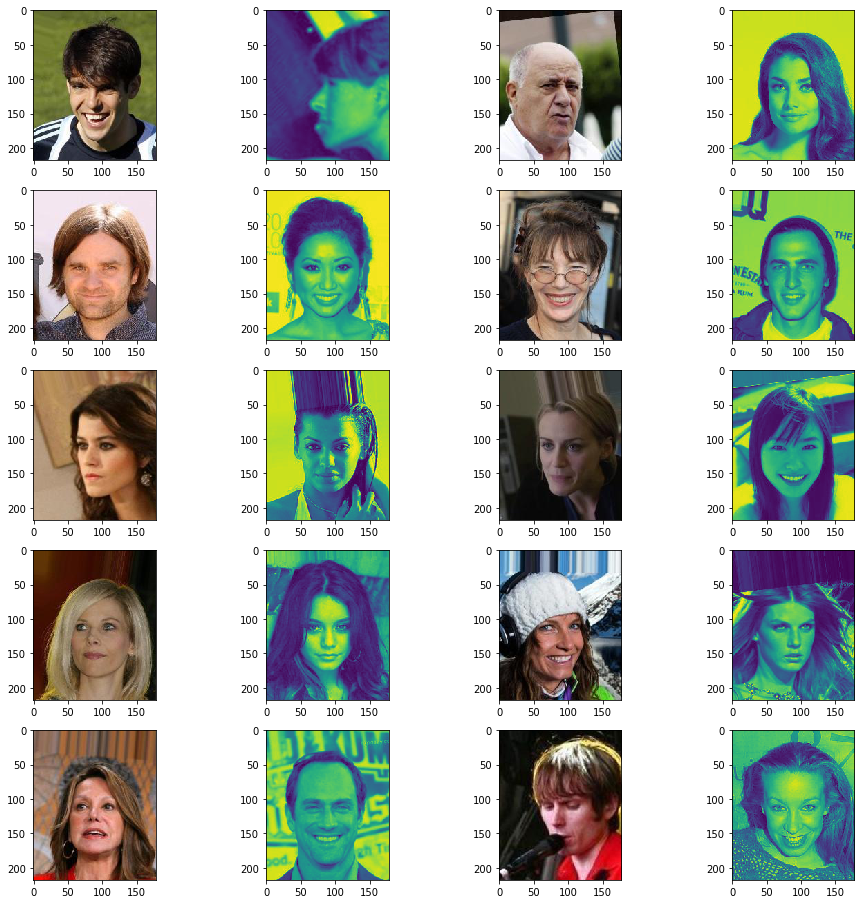

In [35]:
w=10
h=10
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img_id = random.randint(1, 202599)
    img = load_img(img_id)
    if i % 2 == 0:
        img = rgb2gray(img)
    
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [89]:
N_IMAGES = 1000
training_images = [load_img(i) for i in range(1, 1 + N_IMAGES)]
training_images_grey = [rgb2gray(img) for img in training_images]
training_images[0].shape

(218, 178, 3)

In [53]:
training_images_grey_vector = [img.flatten() for img in training_images_grey]
training_images_grey_vector[0].shape
T = np.array(training_images_grey_vector).T

In [62]:
# mean and subtract
T_mean = np.mean(T, axis=1).reshape(-1, 1)
T -= T_mean
T.shape

(38804, 1000)

In [74]:
XX = np.dot(T.T, T)

In [86]:
# we got now the right eigenv
w, v = np.linalg.eigh(XX)

In [87]:
# to get the real eignv of the left side we have to 
# u_real = T*v_i
u = np.dot(T, v)

In [96]:
u_ = u.reshape((218, 178, 1000))
u_.shape
u_[:, :, -3].shape

(218, 178)

Most variance eigenfaces


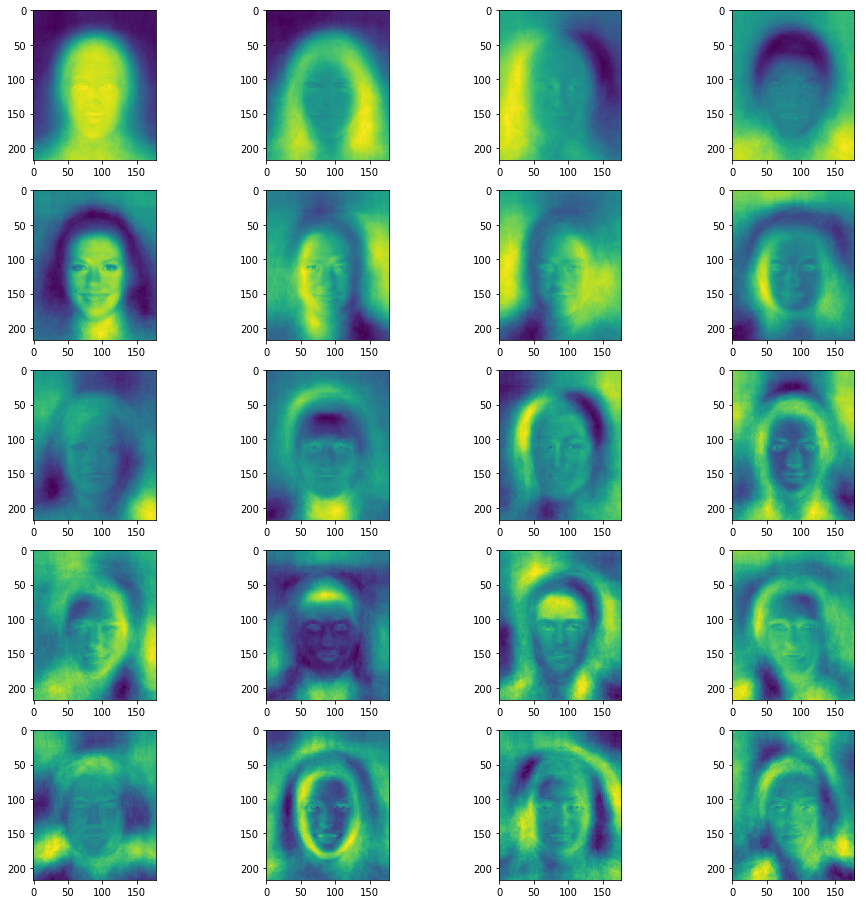

In [100]:
w=10
h=10
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 5

print('Most variance eigenfaces')
for i in range(1, columns*rows +1):
    img = u_[:, :, -i] # sorted in ascending order so take the last few
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

Least variance eigenfaces


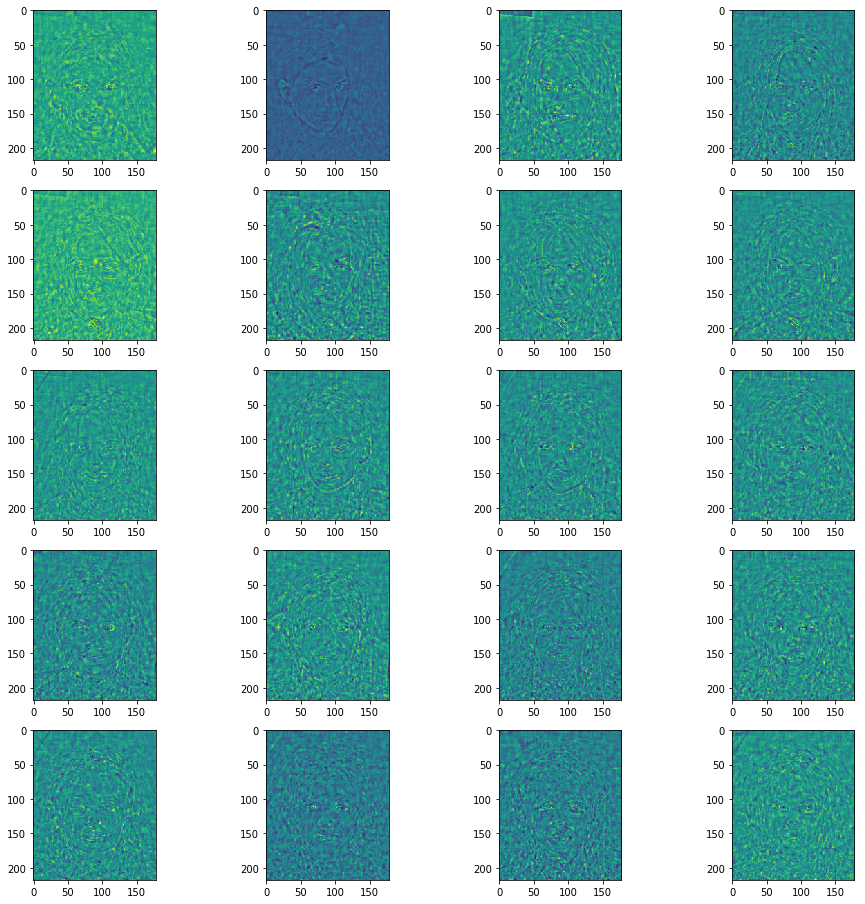

In [102]:
w=10
h=10
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 5


print('Least variance eigenfaces')
for i in range(1, columns*rows +1):
    img = u_[:, :, i] # sorted in ascending order so take the last few
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()